# Этап 4

Этот этап включает в себя создание Docker-образа для вашего проекта и изменение манифеста MLflow Project для запуска вашего эксперимента в изолированном Docker-контейнере. Вот шаги, которые вам нужно выполнить:

## 1. Создание Dockerfile и файла requirements.txt

В **корневой директории** вашего проекта создайте файл Dockerfile и requirements.txt с следующим содержимым:

In [1]:
# В каталоге вашего проекта создайте файл с именем MLproject (без расширения файла).

import os

# Создание файлов внутри директорий
open("Dockerfile", "w").close()
open("requirements.txt", "w").close()

In [2]:
import os

In [4]:
Docker_ML_content = """
# Используйте официальный образ Python
FROM python:3.10-slim-buster

# Установите рабочую директорию в /app
WORKDIR /app

# Копируйте текущий каталог в /app
COPY . /app

# Установите все необходимые пакеты из файла requirements.txt
COPY requirements.txt /tmp
RUN pip install -r /tmp/requirements.txt

# Запустите train.py при запуске контейнера
CMD ["python", "train.py"]
"""
with open("Dockerfile", "w") as file:
    file.write(Docker_ML_content)

In [3]:
requirements_ML_content = """
cryptography==41.0.3
boto3==1.28.39
mlflow==2.6.0
pymysql==1.1.0
scikit-learn==1.0.2
pandas==1.4.4
"""

with open("requirements.txt", "w") as file:
    file.write(requirements_ML_content)


## 2. Сборка Docker-образа

In [20]:
!docker build -f Dockerfile -t kinopoisk:1.0.0 .

#0 building with "default" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 428B 0.0s done
#1 DONE 0.0s

#2 [internal] load .dockerignore
#2 transferring context: 2B 0.0s done
#2 DONE 0.0s

#3 [internal] load metadata for docker.io/library/python:3.10-slim-buster
#3 ...

#4 [auth] library/python:pull token for registry-1.docker.io
#4 DONE 0.0s

#3 [internal] load metadata for docker.io/library/python:3.10-slim-buster
#3 DONE 5.7s

#5 [1/5] FROM docker.io/library/python:3.10-slim-buster@sha256:37aa274c2d001f09b14828450d903c55f821c90f225fdfdd80c5180fcca77b3f
#5 DONE 0.0s

#6 [internal] load build context
#6 transferring context: 61.13kB 0.1s done
#6 DONE 0.1s

#7 [2/5] WORKDIR /app
#7 CACHED

#8 [3/5] COPY . /app
#8 DONE 2.6s

#9 [4/5] COPY requirements.txt /tmp
#9 DONE 0.0s

#10 [5/5] RUN pip install -r /tmp/requirements.txt
#10 3.345 Collecting cryptography==41.0.3
#10 4.107   Downloading cryptography-41.0.3-cp37-abi3-manylin

## 3. Изменение манифеста MLflow Project

In [6]:
MLproject_content = """
name: kinopoisk_project

docker_env:
  image: kinopoisk:1.0.0

entry_points:
  main:
    parameters:
      data_file: {type: str, default: "datasets/kinopoisk_train.csv"}
    command: "python train.py"
"""
with open("MLproject", "w") as file:
    file.write(MLproject_content)

## 4. Запуск эксперимента с помощью MLflow

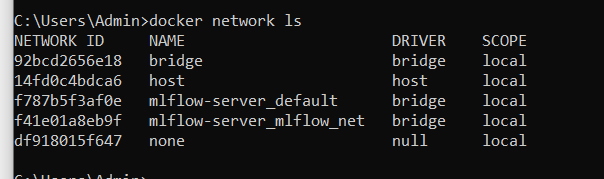


In [28]:
!mlflow run . --experiment-name=kinopoisk --docker-args network=mlflow-server_mlflow_net --build-image

Р›РёРЅРµР№РЅР°СЏ СЂРµРіСЂРµСЃСЃРёСЏ РѕР±СѓС‡РёР»Р°СЃСЊ, С‚РѕС‡РЅРѕСЃС‚СЊ РЅР° РїСЂРѕРІРµСЂРѕС‡РЅРѕР№ РІС‹Р±РѕСЂРєРµ: 0.7549987344975956


C:\Users\Admin\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
2023/10/12 19:01:56 INFO mlflow.projects.docker: === Building docker image kinopoisk_project ===
2023/10/12 19:02:34 INFO mlflow.projects.docker: Temporary docker context file C:\Users\Admin\AppData\Local\Temp\tmpkyfsa0wx was not deleted.
2023/10/12 19:02:34 INFO mlflow.projects.utils: === Created directory C:\Users\Admin\AppData\Local\Temp\tmpaa1aqp_b for downloading remote URIs passed to arguments of type 'path' ===
2023/10/12 19:02:34 INFO mlflow.projects.backend.local: === Running command 'docker run --rm --network mlflow-server_mlflow_net -e MLFLOW_RUN_ID=2f8c0823008e4081abe4c8eac6c65a92 -e MLFLOW_TRACKING_URI=http://localhost:5050 -e MLFLOW_EXPERIMENT_ID=1 -e AWS_SECRET_ACCESS_KEY=minio123 -e AWS_ACCESS_KEY_ID=minio -e MLFLOW_S3_ENDPOINT_URL=http://localhost:9000 kinopoisk_project:latest python train.py' in run with ID 

## 5. Запуск эксперимента прямо из репозитория

In [ ]:
# mlflow run {path_to_your_git_repo} --experiment-name=kinopoisk --docker-args network=mlflow-server_mlflow_net --build-image

Теперь ваш эксперимент будет запускаться в изолированном Docker-контейнере с фиксированным окружением, и код для эксперимента будет извлекаться из вашего удаленного Git-репозитория, что обеспечивает повторяемость и воспроизводимость экспериментов.